In [25]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

import netCDF4 as nc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import gsw
import cmocean as cm
import arrow
import warnings
warnings.filterwarnings('ignore')
import glob

In [26]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
### PI6 test
print('day 20151129 (2 days after start of run)')
PI6test_dir = '/data/tjarniko/results/PI6test/27nov15/'
PI5_dir = '/data/tjarniko/results/BASERUN_EXP/PI5/ncs/'

ncname = 'SKOG_1d_*_carp_T_20151129-20151129.nc'

PI6test_dir = (glob.glob(f'{PI6test_dir}{ncname}'))
PI6test_nc = nc.Dataset(PI6test_dir[0])

PI5_dir = (glob.glob(f'{PI5_dir}{ncname}'))
PI5_nc = nc.Dataset(PI5_dir[0])

PI6_DIC = PI6test_nc['dissolved_inorganic_carbon'][:]
PI5_DIC = PI5_nc['dissolved_inorganic_carbon'][:]        

day 20151129 (2 days after start of run)


In [28]:
diff = (PI6_DIC-PI5_DIC)
print(f'min that the PI6test and PI5 run differ from each other in umol/L: {np.min(diff)}')
print(f'max that the PI6test and PI5 run differ from each other in umol/L: {np.max(diff)}')

print(np.shape(PI6_DIC))

diff = (PI6_DIC-PI5_DIC)
print(f'mean that the PI6test and PI5 run differ from each other in umol/L: {np.nanmean(diff)}')
#print(f'max that the PI6test and PI5 run differ from each other in umol/L: {np.max(diff)}')

print(np.shape(PI6_DIC))


min that the PI6test and PI5 run differ from each other in umol/L: -17.9259033203125
max that the PI6test and PI5 run differ from each other in umol/L: 31.49310302734375
(1, 40, 898, 398)
mean that the PI6test and PI5 run differ from each other in umol/L: -2.74379435722949e-05
(1, 40, 898, 398)


Text(0.03, 0.03, 'c)')

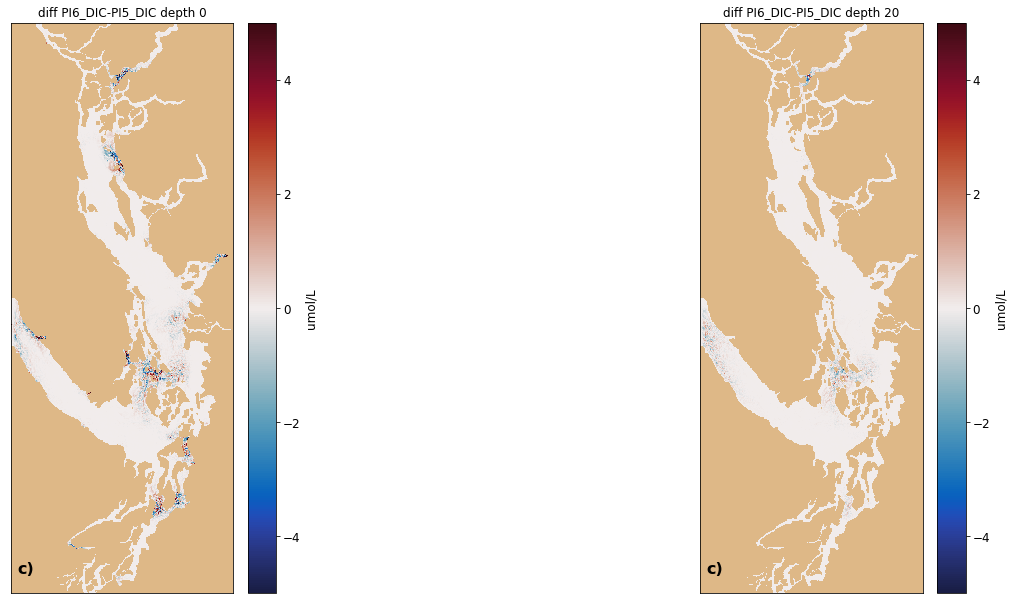

In [29]:
from salishsea_tools import viz_tools

fs = 12
fact = 1
fig = plt.figure(figsize=(17.5*fact, 10.5*fact)) 

ax3 = plt.subplot2grid((1,3), (0,0), colspan=1,rowspan = 2)
tplt = diff[0,0,:,:]
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-5, vmax=5)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'burlywood')
ax3.set_title('diff PI6_DIC-PI5_DIC depth 0', fontsize = fs)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label('umol/L', fontsize = fs)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')



ax3 = plt.subplot2grid((1,3), (0,2), colspan=1,rowspan = 2)
tplt = diff[0,20,:,:]
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-5, vmax=5)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'burlywood')
ax3.set_title('diff PI6_DIC-PI5_DIC depth 20', fontsize = fs)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label('umol/L', fontsize = fs)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')


